In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [366]:
df = pd.read_csv('Reviews.csv')
df = df[:5000]

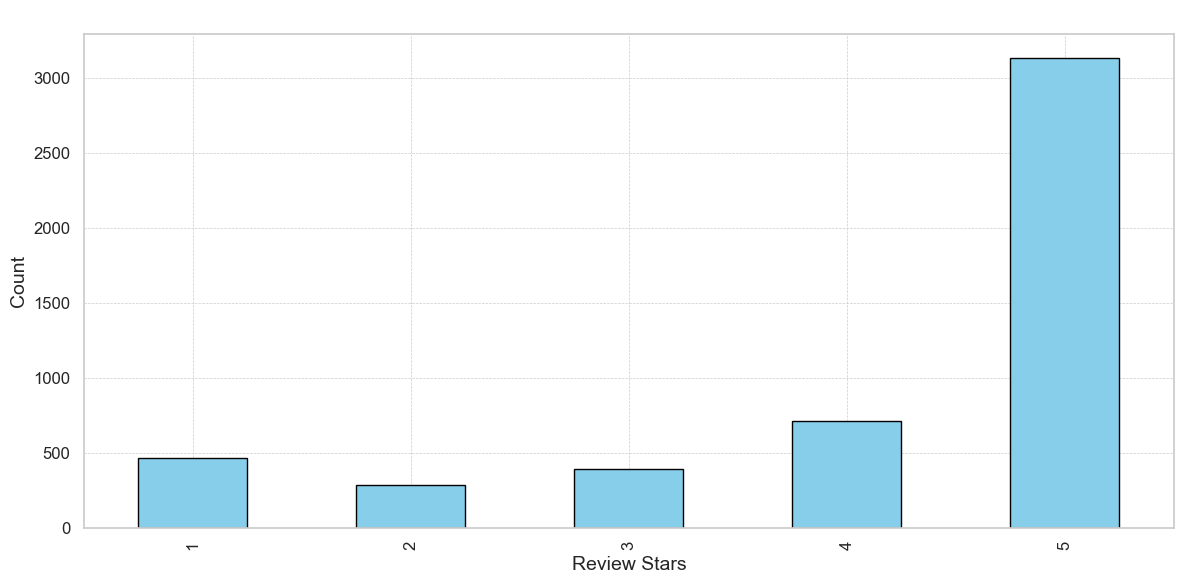

In [367]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax = df['Score'].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

# Set the title and labels
ax.set_title('Count of Reviews by Stars', fontsize=16, fontweight='bold')
ax.set_xlabel('Review Stars', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Customize the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add gridlines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [368]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [369]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [370]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [371]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [372]:
##VADER Valence Aware Dictionary and Sentiment Reasoner, bag of word approach
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()


In [373]:
result = {}


for index, row in df.iterrows():
    review_id = row['Id']
    review_text = row['Text']
    sentiment_scores = sia.polarity_scores(review_text)
    result[review_id] = sentiment_scores



In [374]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


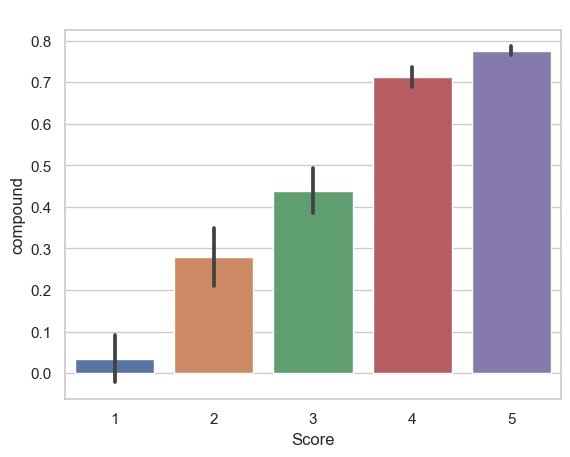

In [375]:
ax = sns.barplot(data=vaders, x= 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()


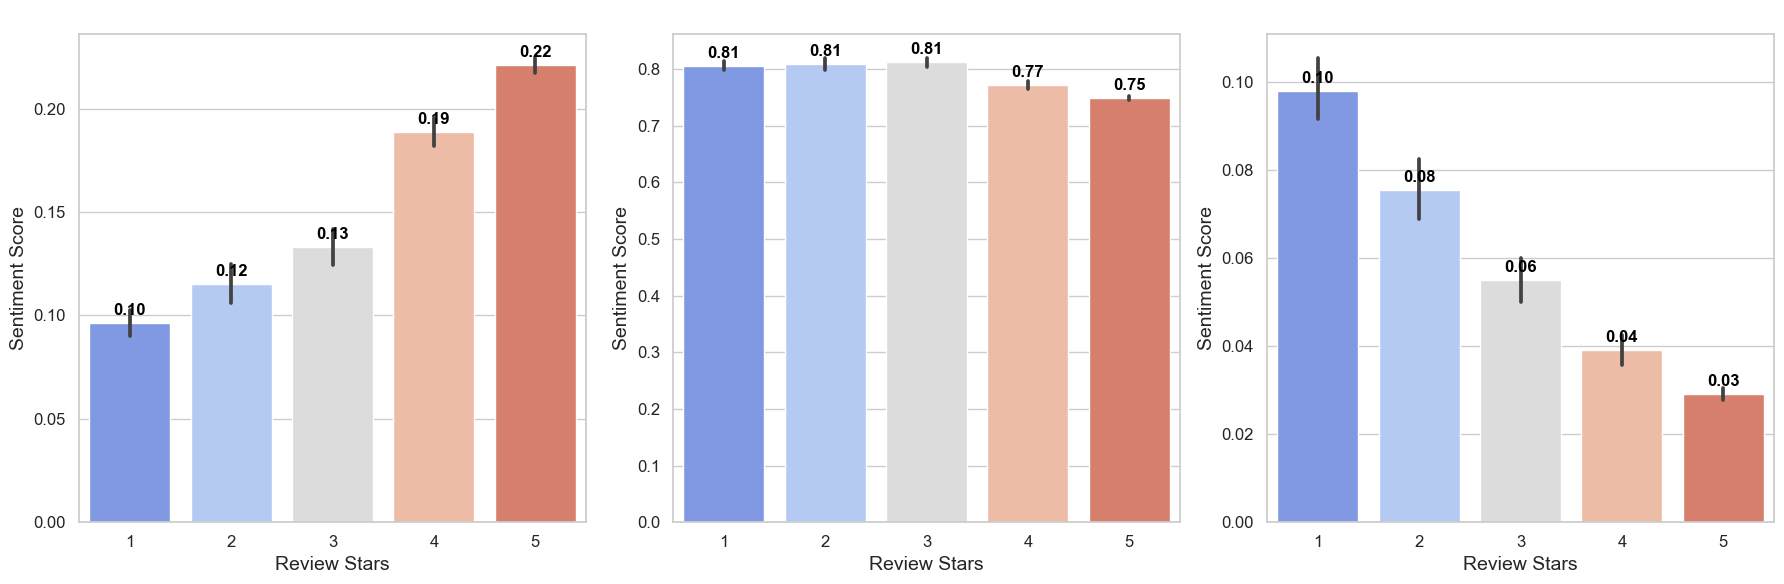

In [376]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

titles = ['Positive Sentiment', 'Neutral Sentiment', 'Negative Sentiment']

sentiments = ['pos', 'neu', 'neg']

palette = sns.color_palette("coolwarm", 5)

for i, sentiment in enumerate(sentiments):
    sns.barplot(data=vaders, x='Score', y=sentiment, ax=axs[i], palette=palette)
    
    axs[i].set_title(titles[i], fontsize=16, fontweight='bold')
    
    axs[i].set_xlabel('Review Stars', fontsize=14)
    axs[i].set_ylabel('Sentiment Score', fontsize=14)
    
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points', 
                        fontsize=12, color='black', weight='bold')

plt.tight_layout()

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\zpicard\AppData\Local\Temp\ipykernel_24936\3045401236.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


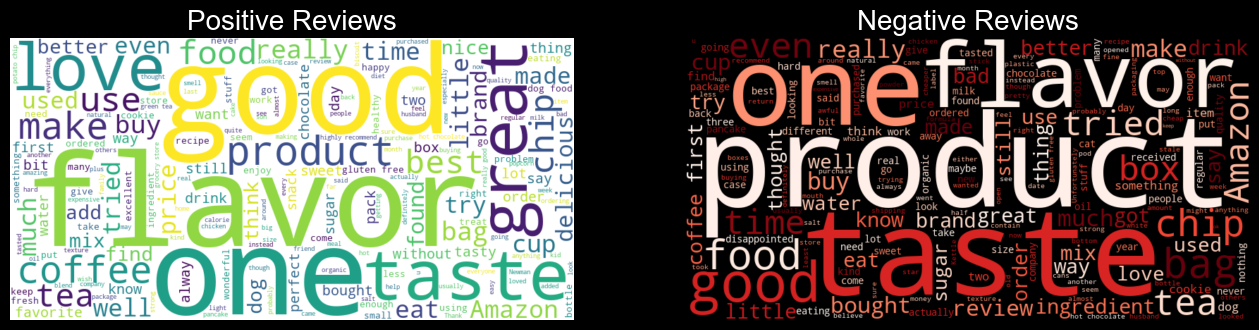

In [395]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)


df['Cleaned_Text'] = df['Text'].apply(clean_html).apply(remove_stopwords)


positive_reviews = df[df['Score'] >= 4]['Cleaned_Text']
negative_reviews = df[df['Score'] <= 2]['Cleaned_Text']


positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(negative_reviews))

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Positive Reviews', fontsize=20)
axs[0].axis('off')

axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Negative Reviews', fontsize=20)
axs[1].axis('off')

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zpicard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\zpicard\AppData\Local\Temp\ipykernel_24936\1120613546.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


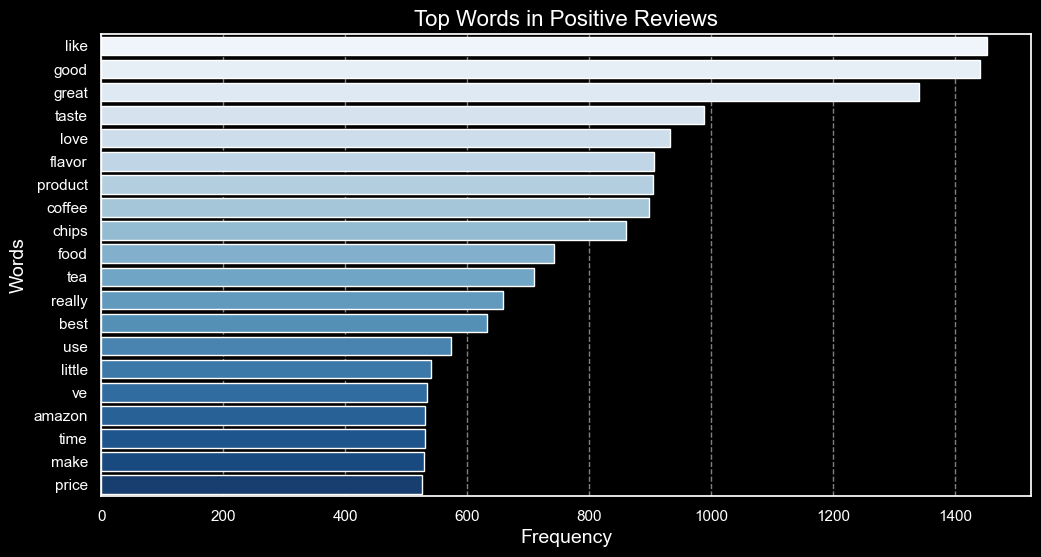

C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


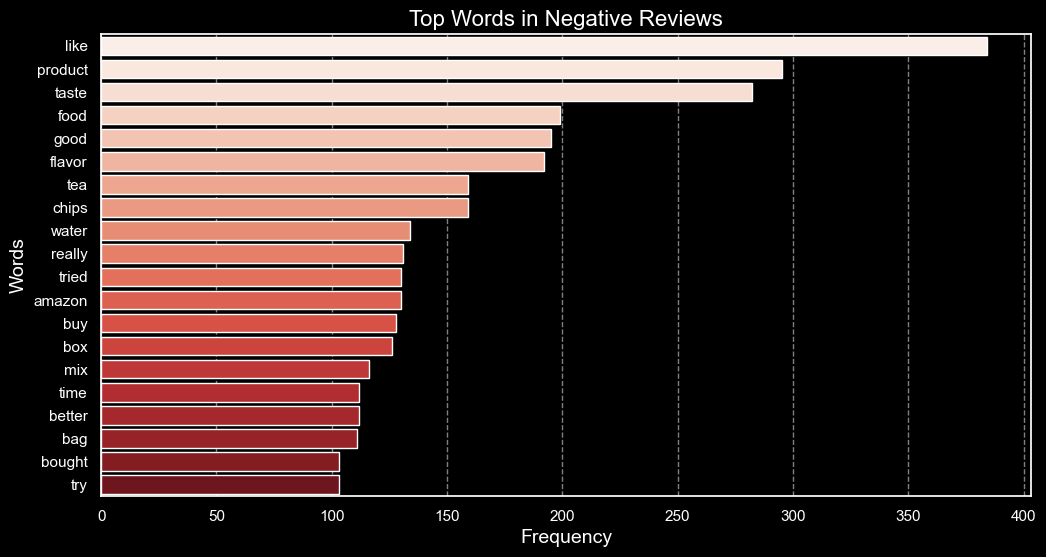

In [396]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()


def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)


df['Cleaned_Text'] = df['Text'].apply(clean_html).apply(remove_stopwords)


positive_reviews = df[df['Score'] >= 4]['Cleaned_Text']
negative_reviews = df[df['Score'] <= 2]['Cleaned_Text']


def plot_top_words(reviews, title, color):
    vec = CountVectorizer(stop_words='english').fit(reviews)
    bag_of_words = vec.transform(reviews)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]
    words, counts = zip(*words_freq)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette=color)
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Words', fontsize=14)
    plt.show()


plot_top_words(positive_reviews, 'Top Words in Positive Reviews', 'Blues')


plot_top_words(negative_reviews, 'Top Words in Negative Reviews', 'Reds')

C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


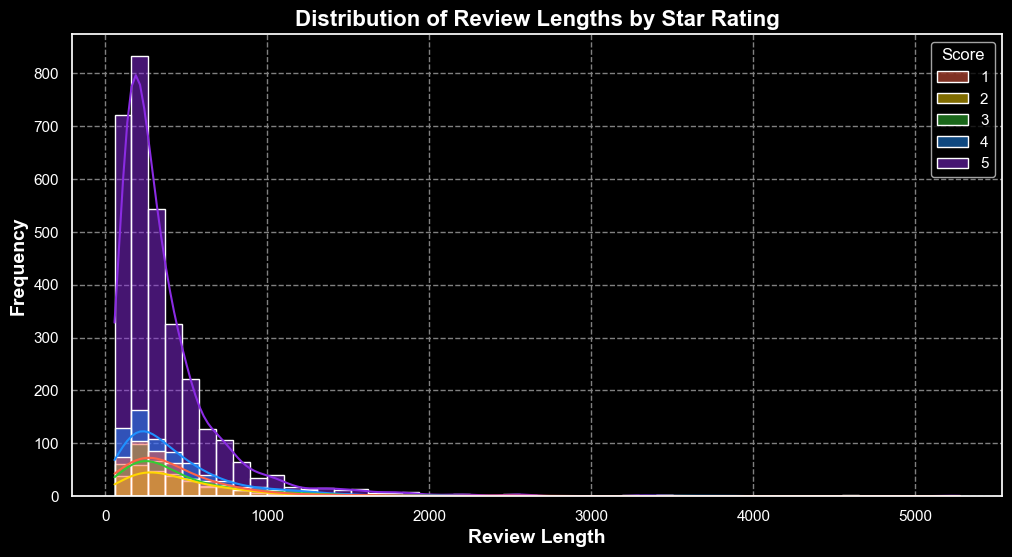

In [379]:

df['Review_Length'] = df['Text'].apply(len)


sns.set(style="darkgrid")


plt.rcParams.update({
    'axes.facecolor': 'black',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'figure.facecolor': 'black',
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})


custom_palette = {
    1: "#FF6347",  # Tomato
    2: "#FFD700",  # Gold
    3: "#32CD32",  # LimeGreen
    4: "#1E90FF",  # DodgerBlue
    5: "#8A2BE2"   # BlueViolet
}


plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Review_Length', bins=50, kde=True, hue='Score', palette=custom_palette)


plt.title('Distribution of Review Lengths by Star Rating', fontsize=16, fontweight='bold')
plt.xlabel('Review Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


plt.show()

C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


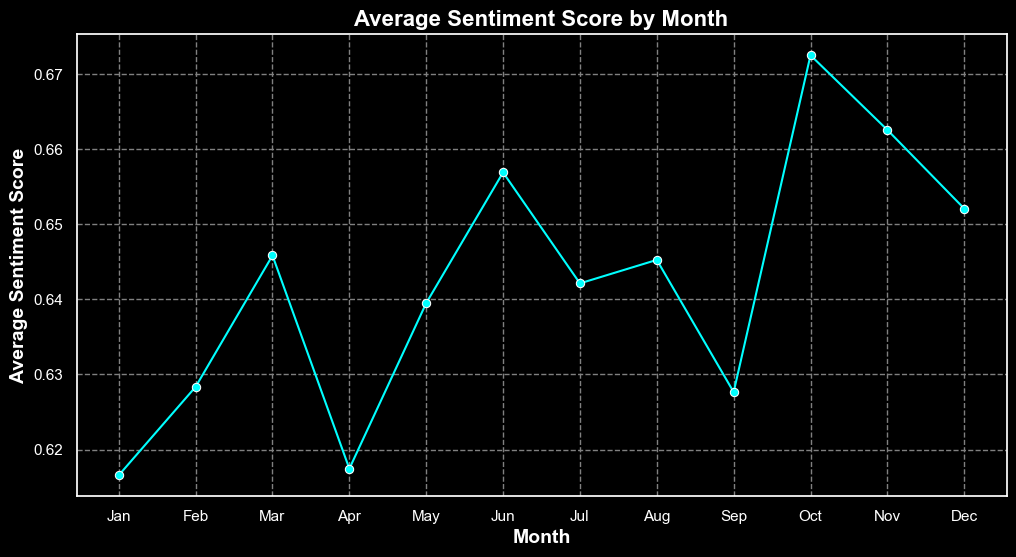

In [380]:
vaders['Time'] = pd.to_datetime(vaders['Time'], unit='s')
vaders['Month'] = vaders['Time'].dt.month
monthly_sentiment = vaders.groupby('Month')['compound'].mean().reset_index()

sns.set(style="darkgrid")
plt.rcParams.update({
    'axes.facecolor': 'black',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'figure.facecolor': 'black',
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sentiment, x='Month', y='compound', marker='o', color='cyan')
plt.title('Average Sentiment Score by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Average Sentiment Score', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\zpicard\AppData\Local\Temp\ipykernel_24936\4061868270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_reviews['Day'] = october_reviews['Time'].dt.day
C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zpicard\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


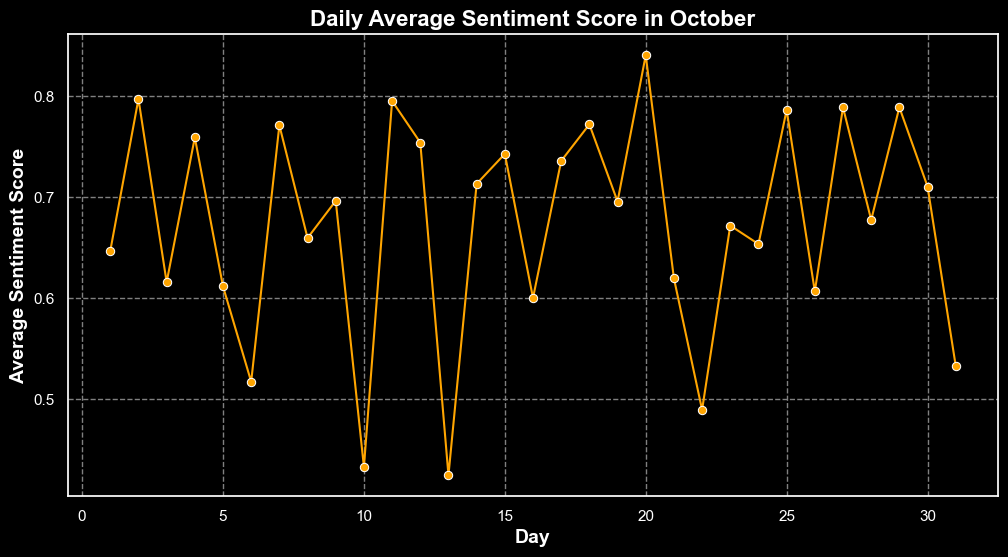

In [394]:
october_reviews = vaders[vaders['Time'].dt.month == 10]


october_reviews['Day'] = october_reviews['Time'].dt.day


daily_sentiment_october = october_reviews.groupby('Day')['compound'].mean().reset_index()


sns.set(style="darkgrid")


plt.rcParams.update({
    'axes.facecolor': 'black',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'figure.facecolor': 'black',
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titlecolor': 'white'
})


plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment_october, x='Day', y='compound', marker='o', color='orange')
plt.title('Daily Average Sentiment Score in October', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=14, fontweight='bold')
plt.ylabel('Average Sentiment Score', fontsize=14, fontweight='bold')
plt.show()

In [391]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Month,Review_Length
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,263
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,9,190
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,8,509
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,6,219
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,10,140


In [141]:
#Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax 

In [154]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

SSLError: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /cardiffnlp/twitter-roberta-base-sentiment/resolve/main/tokenizer_config.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))"), '(Request ID: a19c5392-6710-4c20-8308-85b3003cfa23)')

In [ ]:
# Define the model name
MODEL_NAME = "distilbert-base-uncased-finetuned-sst-2-english"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)